In [2]:
import tensorflow_hub as hub
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import cv2 

In [3]:
content_image = cv2.imread('/content/drive/MyDrive/ProjectII/Images/dog.jpg')
style_image = cv2.imread('/content/drive/MyDrive/ProjectII/Images/starry-night.jpg')


In [4]:
print(content_image.shape)
print(style_image.shape)

(639, 640, 3)
(717, 900, 3)


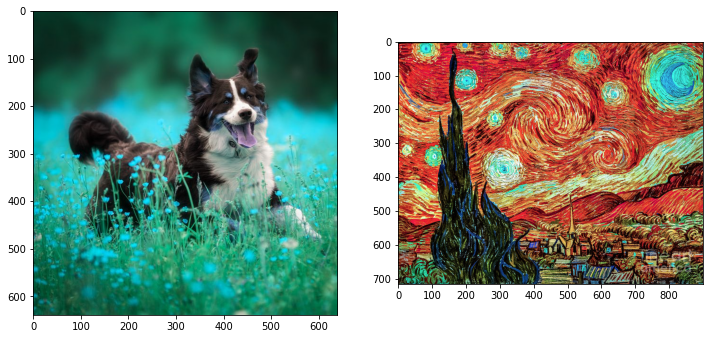

In [5]:
plt.subplot(1, 2, 1)
plt.imshow(content_image)

plt.subplot(1, 2, 2)
plt.imshow(style_image)

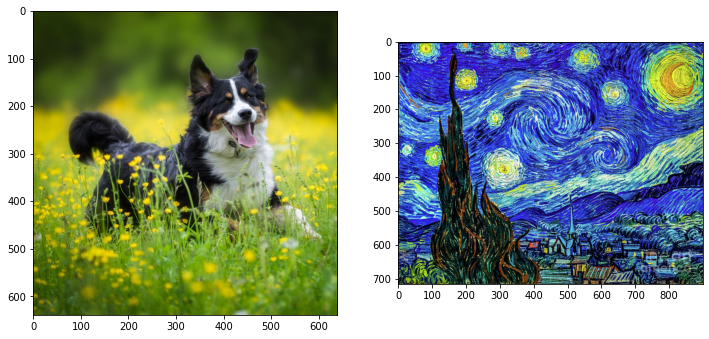

In [6]:
content_image = cv2.cvtColor(content_image, cv2.COLOR_BGR2RGB)
style_image = cv2.cvtColor(style_image, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(content_image)

plt.subplot(1, 2, 2)
plt.imshow(style_image)

In [7]:
content_image = tf.expand_dims(content_image, axis=0)
style_image = tf.expand_dims(style_image, axis=0)

content_image = tf.dtypes.cast(content_image, tf.float32)
style_image = tf.dtypes.cast(style_image, tf.float32)

print(content_image.shape)
print(style_image.shape)

(1, 639, 640, 3)
(1, 717, 900, 3)


(1, 640, 640, 3)


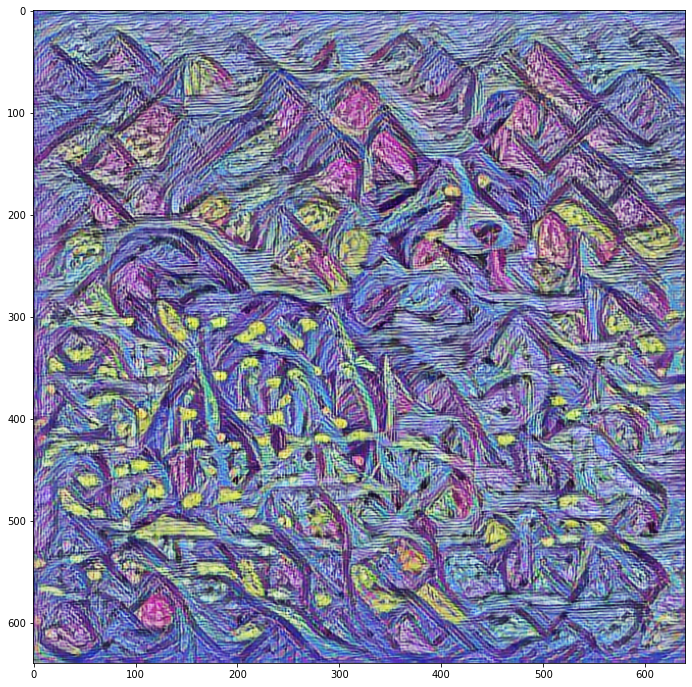

In [9]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = model(content_image/255.0, style_image/255.0)[0]

print(stylized_image.shape)
plt.imshow(stylized_image[0])

In [ ]:
import PIL.Image

def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)

  return PIL.Image.fromarray(tensor)

In [ ]:
file_name = 'stylized-image-tf-hub.png'
tensor_to_image(stylized_image[0]).save(file_name)

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(file_name)